In [1]:
import numpy as np
from networkx import nx
import matplotlib.pyplot as plt
from random import sample

In [2]:
def generate_graph(v=100, e=200):
    graph = nx.gnm_random_graph(v, e)
    return graph

In [3]:
def adjacency_matrix(graph):
    adj_matrix = [[0 for _ in range(len(graph))] for _ in range(len(graph))]
    for edge in graph.edges:
        adj_matrix[edge[0]][edge[1]] = adj_matrix[edge[1]][edge[0]]  = 1
    return adj_matrix

In [4]:
def convert_adj_matrix_to_list(adj_matrix):
    adj_list = {i:[] for i in range(100)}
    for i in range(len(adj_matrix)):
        for j in range(len(row)):
            if adj_matrix[i][j] == 1:
                adj_list[i].append(j)
    return adj_list

In [5]:
def show_graph(graph):
    plt.figure(figsize=(20, 20))
    nx.draw_spring(graph, with_labels=True)
    plt.show()

In [6]:
#Depth-first search to find connected components of the graph 
def dfs(temp, v, visited): 
    visited[v] = True
    temp.append(v) 
    for i in adj_list[v]: 
        if visited[i] == False: 
            temp = dfs(temp, i, visited) 
    return temp

In [7]:
def connected_components(): 
        visited = [] 
        cc = [] 
        for i in range(100): 
            visited.append(False) 
        for v in range(100): 
            if visited[v] == False: 
                temp = [] 
                cc.append(dfs(temp, v, visited)) 
        return cc

In [8]:
def number_of_connected_components():
    return len(connected_components())

In [9]:
#Breadth-first search to find a shortest path between two random vertices
def bfs_shortest_path(start, goal):
    visited = []
    queue = [[start]]
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in visited:
            neighbours = adj_list[node]
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                if neighbour == goal:
                    return new_path
 
            visited.append(node)
    return 'No path'

Part 1

In [10]:
#generate random graph with 100 vertices and 200 edges
graph = generate_graph(100, 200)

In [11]:
#the first two rows of adjacency_matrix
adj_matrix = adjacency_matrix(graph)
for row in adj_matrix[:2]:
    print(row)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
#adjacency list (the first 5 rows of it)
adj_list = convert_adj_matrix_to_list(adj_matrix)
for row in list(adj_list.items())[:5]:
    print(row)

(0, [44, 47])
(1, [])
(2, [63, 76, 87])
(3, [12, 34, 70, 87, 98])
(4, [13, 27, 33, 69, 95])


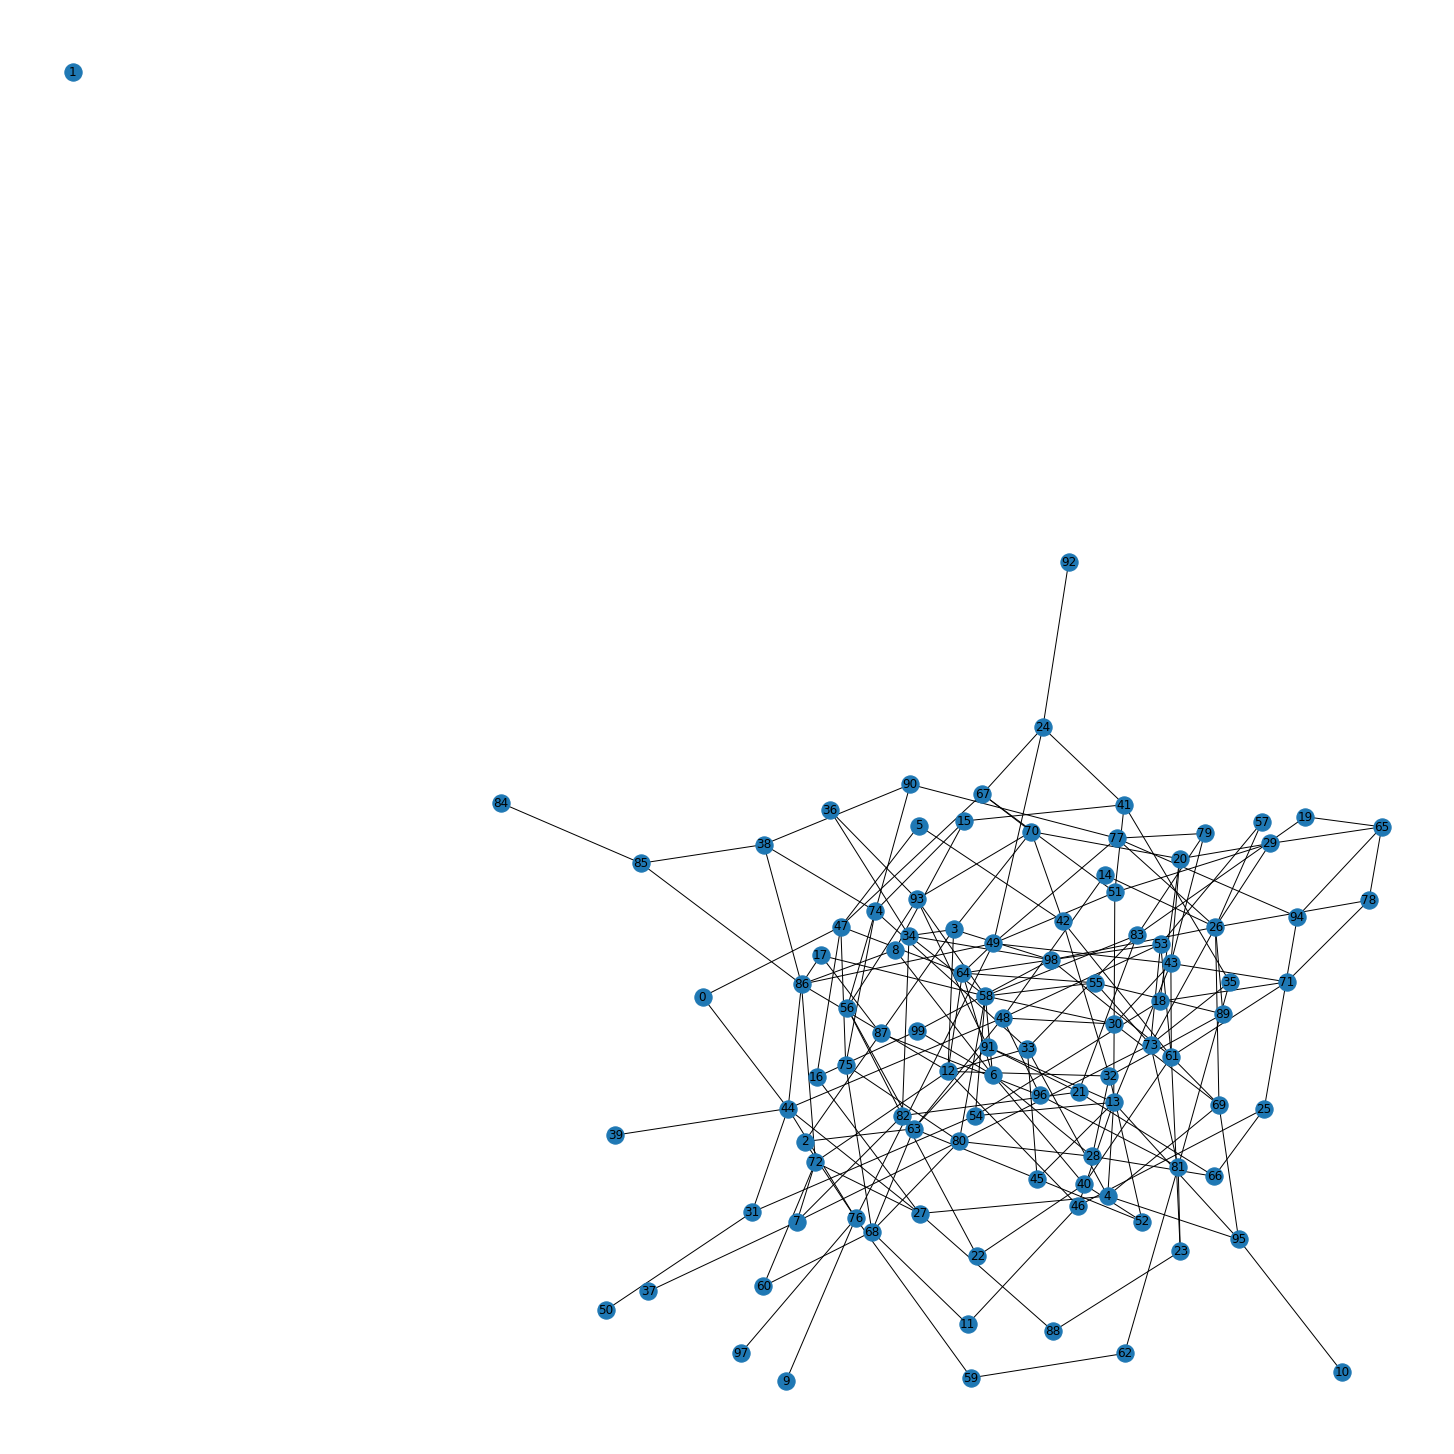

In [13]:
show_graph(graph)

Part 2

In [14]:
print ('Number of connected components of the graph = ',number_of_connected_components())

Number of connected components of the graph =  2


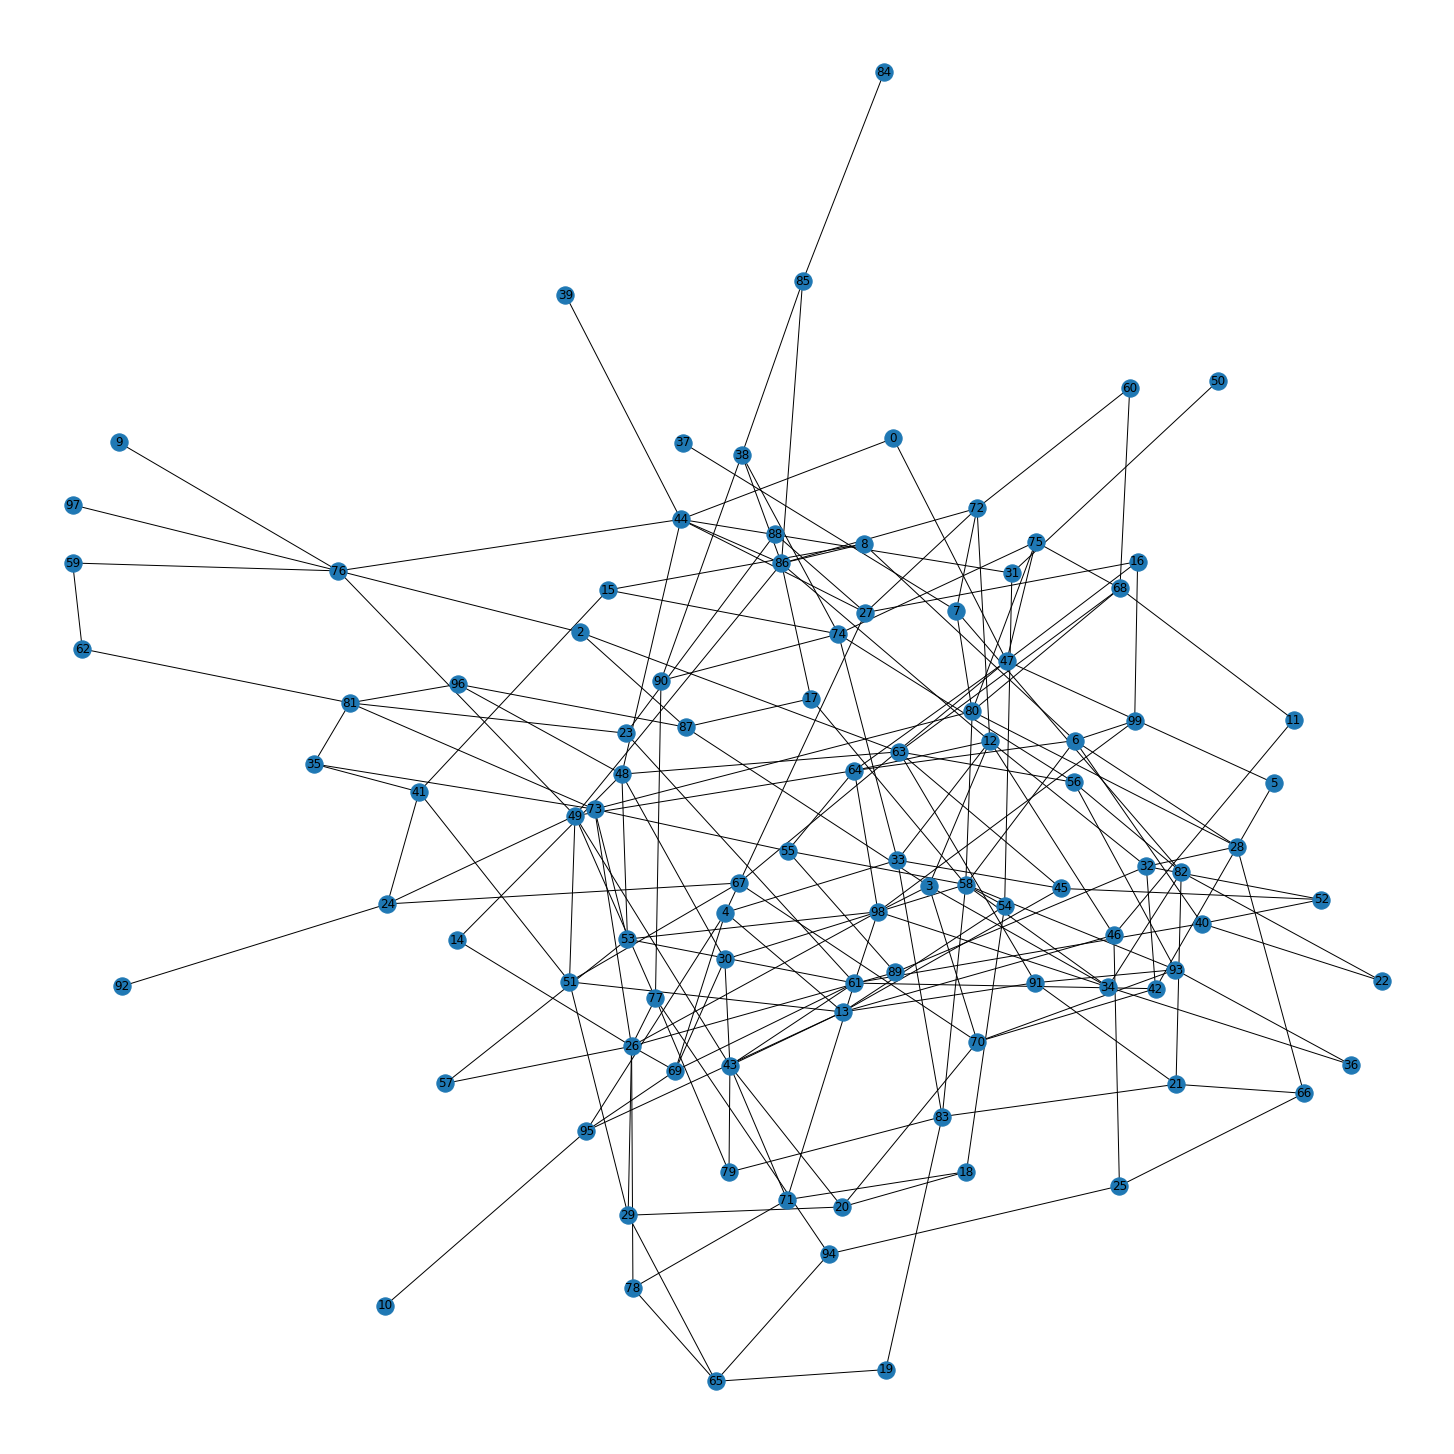

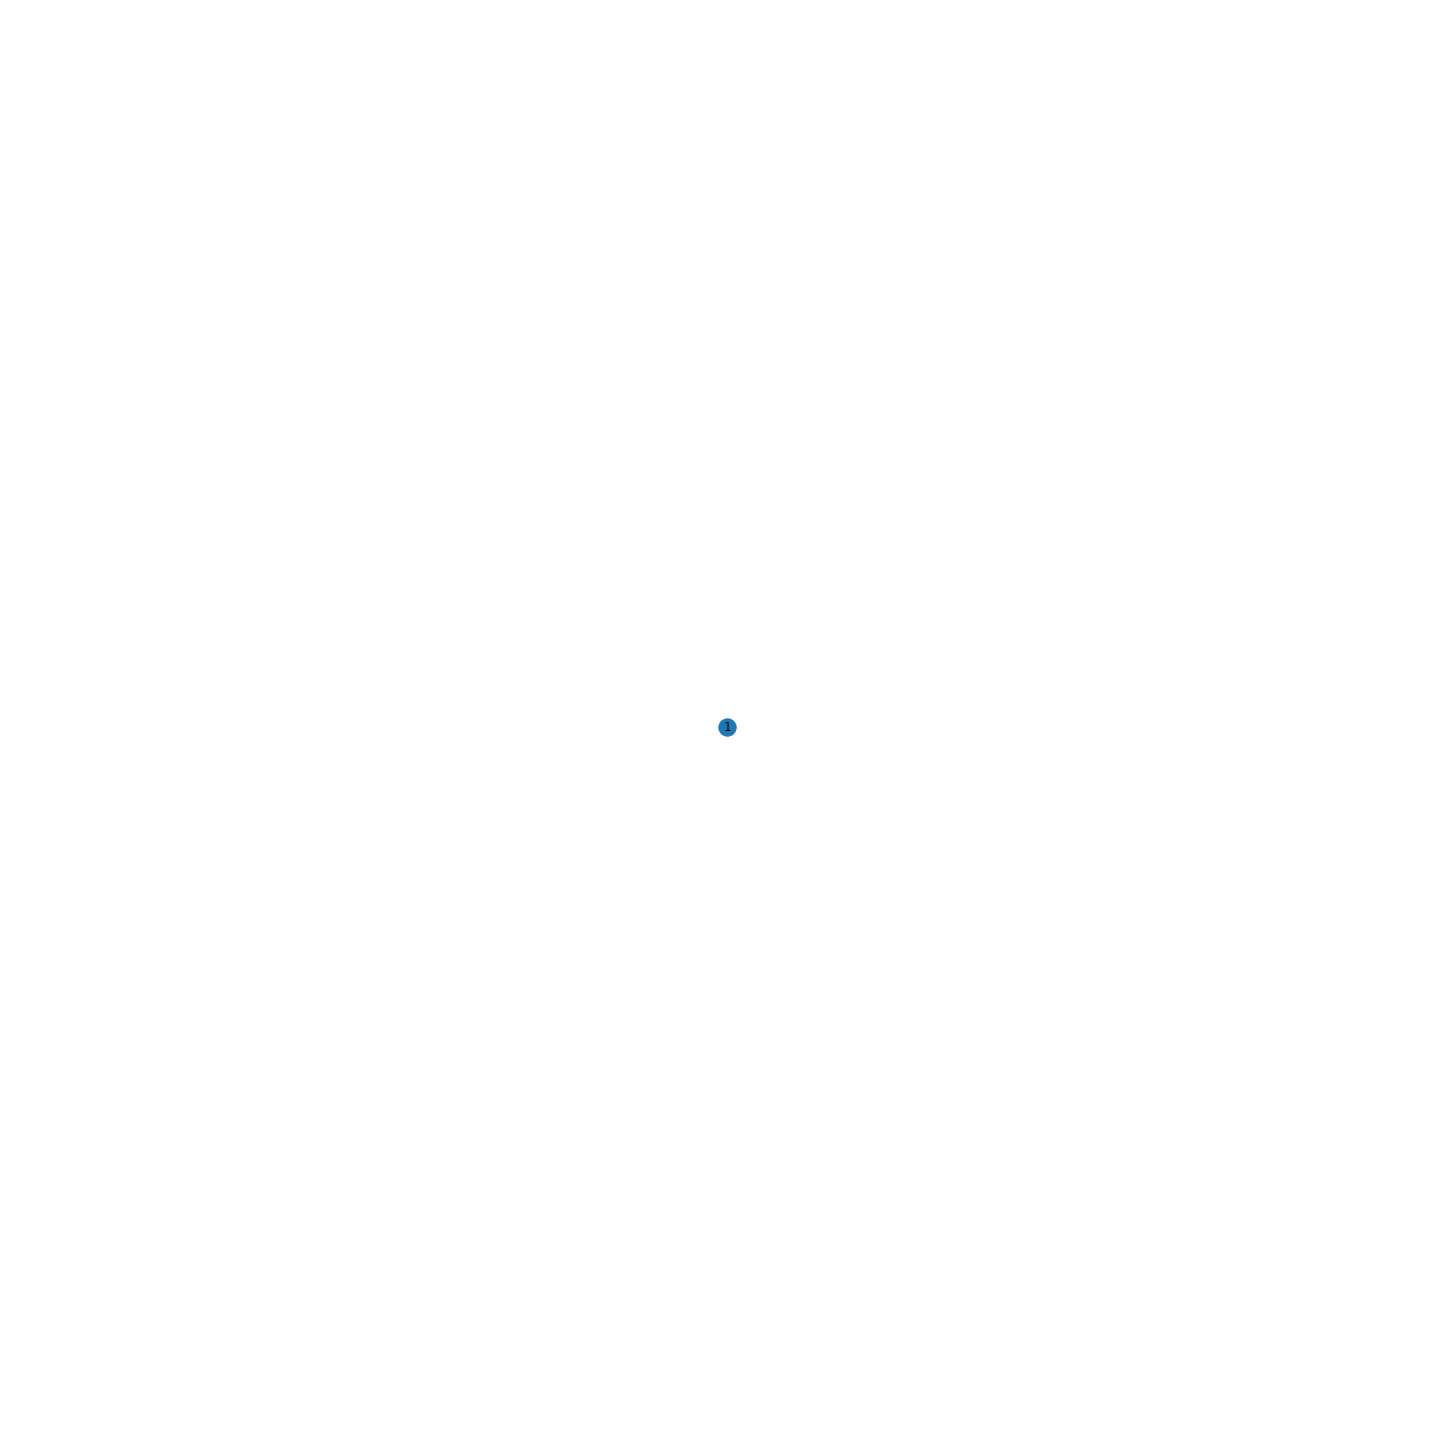

In [15]:
for cc in connected_components():
    show_graph(graph.subgraph(cc))

In [16]:
# a shortest path between two random vertices
a,b = sample(graph.nodes, 2)
print ('Shortest path between two vertices {} and {}:'.format(a, b), bfs_shortest_path(a,b))

Shortest path between two vertices 53 and 74: [53, 48, 63, 56, 74]


In [17]:
a,b = sample(graph.nodes, 2)
print ('Shortest path between two vertices {} and {}:'.format(a, b), bfs_shortest_path(a,b))

Shortest path between two vertices 64 and 69: [64, 98, 26, 69]


In [18]:
a,b = sample(graph.nodes, 2)
print ('Shortest path between two vertices {} and {}:'.format(a, b), bfs_shortest_path(a,b))

Shortest path between two vertices 24 and 98: [24, 49, 64, 98]


In [20]:
a,b = 1,10
print ('Shortest path between two vertices {} and {}:'.format(a, b), bfs_shortest_path(a,b))

Shortest path between two vertices 1 and 10: No path
